# Proyek Analisis Data: Day_Bike Sharing
- **Nama:** Adam Noor Falah
- **Email:** adamfalah2003@gmail.com
- **ID Dicoding:** adam_noor_falah_aBDl

## Menentukan Pertanyaan Bisnis

- Pengaruh musim dan cuaca dengan banyaknya penyewaaan sepeda?
-  Bagaimana korelasi antara temp, atem, hum, windspeed dengan cnt dalam menentukan banyaknya penyewaaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
sepeda_harian = pd.read_csv("/content/day.csv")
sepeda_harian.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
sepeda_harian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
sepeda_harian.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Cek: Missing Value dan Tipe data pada Data**
- Tidak ada Missing Value
- Tipe data tidak sesuai, diantaranya.

dteday = Date \
season, yr, mnth, weekday, weathersit = Categorical \
holiday dan workingday = Binary

In [ ]:
print("Duplikasi pada data : ", sepeda_harian.duplicated().sum())

Duplikasi pada data :  0


**Cek: Duplikasi pada Data**
- Tidak ada Duplikasi

### Cleaning Data

**Mengubah: dteday menjadi data datetime**

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  sepeda_harian[column] = pd.to_datetime(sepeda_harian[column])

In [ ]:
sepeda_harian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Memberi label pada data season**

In [ ]:
label_musim = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}
sepeda_harian['season'] = sepeda_harian['season'].replace(label_musim)

In [ ]:
sepeda_harian['season'].value_counts()

,count
season,
Musim Panas,188
Musim Semi,184
Musim Dingin,181
Musim Gugur,178


In [ ]:
label_tahun = {0: '2011', 1: '2012'}
sepeda_harian['yr'] = sepeda_harian['yr'].replace(label_tahun)

In [ ]:
sepeda_harian['yr'].value_counts()

,count
yr,
2012,366
2011,365


In [ ]:
label_bulan =  {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
sepeda_harian['mnth'] = sepeda_harian['mnth'].replace(label_bulan)

In [ ]:
sepeda_harian['mnth'].value_counts()

,count
mnth,
Januari,62
Maret,62
Mei,62
Juli,62
Agustus,62
Oktober,62
Desember,62
April,60
Juni,60


In [ ]:
label_libur =  {0 : 'Tak Libur', 1 : 'Libur'}
sepeda_harian['holiday'] = sepeda_harian['holiday'].replace(label_libur)

In [ ]:
sepeda_harian['holiday'].value_counts()

,count
holiday,
Tak Libur,710
Libur,21


In [ ]:
label_weekday =  {6 : 'Sabtu', 0 : 'Minggu', 1 : 'Senin',  2 : 'Selasa',  3 : 'Rabu',  4 : 'Kamis',  5 : 'Jumat'}
sepeda_harian['weekday'] = sepeda_harian['weekday'].replace(label_weekday)

In [ ]:
sepeda_harian['weekday'].value_counts()

,count
weekday,
Sabtu,105
Minggu,105
Senin,105
Selasa,104
Rabu,104
Kamis,104
Jumat,104


In [ ]:
label_work =  {0 : 'Tak Kerja', 1 : 'Kerja'}
sepeda_harian['workingday'] = sepeda_harian['workingday'].replace(label_work)

In [ ]:
sepeda_harian['workingday'].value_counts()

,count
workingday,
Kerja,500
Tak Kerja,231


In [ ]:
label_cuaca =  {1 : 'Sedikit Berawan', 2 : 'Berkabut', 3 : "Petir/Hujan/Salju", 4 : 'Badai Hujan/Badai Salju'}
sepeda_harian['weathersit'] = sepeda_harian['weathersit'].replace(label_cuaca)

In [ ]:
sepeda_harian['weathersit'].value_counts()

,count
weathersit,
Berawan,463
Berkabut,247
Petir/Hujan/Salju,21


In [ ]:
sepeda_harian.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Dingin,2011,Januari,Tak Libur,Sabtu,Tak Kerja,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Dingin,2011,Januari,Tak Libur,Minggu,Tak Kerja,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Dingin,2011,Januari,Tak Libur,Senin,Kerja,Sedikit Berawan,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Dingin,2011,Januari,Tak Libur,Selasa,Kerja,Sedikit Berawan,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Dingin,2011,Januari,Tak Libur,Rabu,Kerja,Sedikit Berawan,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
sepeda_harian.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
sepeda_harian.groupby(by="holiday").agg({
    "holiday": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "cnt": ["max", "min", "mean"]  # Membuat fungsi kustom untuk range
}).sort_values(by=("holiday", "count"), ascending=False)

holiday   cnt                   
            count   max   min         mean
holiday                                   
Tak Libur     710  8714    22  4527.104225
Libur          21  7403  1000  3735.000000

In [ ]:
sepeda_harian.groupby(by="workingday").agg({
    "workingday": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "cnt": ["max", "min", "mean"]  # Membuat fungsi kustom untuk range
}).sort_values(by=("workingday", "count"), ascending=False)

workingday   cnt                  
                count   max  min         mean
workingday                                   
Kerja             500  8362   22  4584.820000
Tak Kerja         231  8714  605  4330.168831

In [ ]:
sepeda_harian.groupby(by="weathersit").agg({
    "weathersit": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "cnt": ["max", "min", "mean"]  # Membuat fungsi kustom untuk range
}).sort_values(by=("weathersit", "count"), ascending=False)

weathersit   cnt                  
                       count   max  min         mean
weathersit                                          
Sedikit Berawan          463  8714  431  4876.786177
Berkabut                 247  8362  605  4035.862348
Petir/Hujan/Salju         21  4639   22  1803.285714

In [ ]:
sepeda_harian.groupby(by="season").agg({
    "season": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "cnt": ["max", "min", "mean"]  # Membuat fungsi kustom untuk range
}).sort_values(by=("season", "count"), ascending=False)

season   cnt                   
              count   max   min         mean
season                                      
Musim Panas     188  8714  1115  5644.303191
Musim Semi      184  8362   795  4992.331522
Musim Dingin    181  7836   431  2604.132597
Musim Gugur     178  8555    22  4728.162921

In [140]:
indatas = ["temp","atemp","hum", "windspeed",  "cnt"]
korelasi = sepeda_harian[indatas].corr()

In [141]:
print(korelasi)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


Pada tabel korelasi dapat ditentukan variabel yang berkontribusi dalam banyaknya penyewaan sepeda. Variabel atemp atau *Normalized feeling temperature in Celsius* mempunyai angka yang lumayan berkontribusi yakni $0.631066$ dibandingan dengan variabel yang lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh musim dan cuaca dengan banyaknya penyewaaan sepeda?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


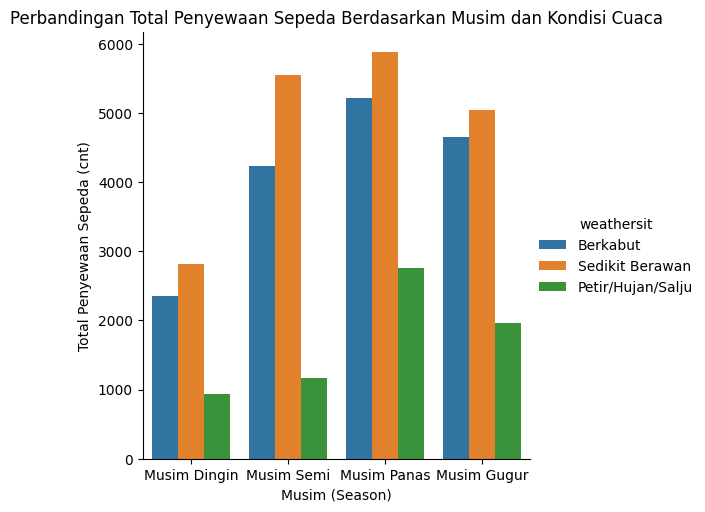

In [ ]:
# Membuat plot perbandingan antara season dan weathersit terhadap cnt (total penyewaan sepeda)
sns.catplot(data=sepeda_harian, x="season", y="cnt", hue="weathersit", kind="bar", errorbar=None)

plt.title('Perbandingan Total Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca')
plt.ylabel('Total Penyewaan Sepeda (cnt)')
plt.xlabel('Musim (Season)')
plt.show()


Terlihat pada barplot di atas ditunjukan bahwa variabel musim dan cuaca berdampak pada banyaknya penyewaan sepeda. Pada musim panas dan cuaca sedikit berawan merupakan variabel terbaik yang berdampak pada banyaknya penyewaan sepeda pada tahun 2011 - 2012

### Pertanyaan 2: Bagaimana korelasi antara temp, atem, hump, windspeed dengan cnt dalam menentukan banyaknya penyewaaan sepeda?

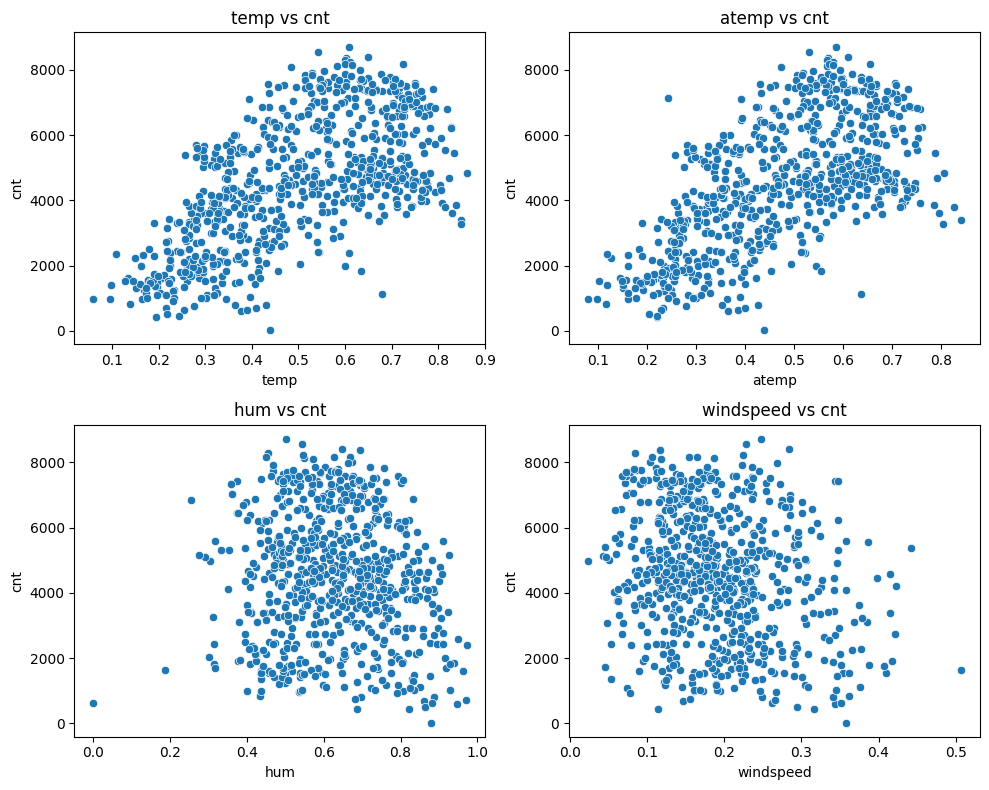

In [126]:
# Membuat subplot grid dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot untuk temp vs cnt
sns.scatterplot(x=sepeda_harian["temp"], y=sepeda_harian["cnt"], ax=axes[0, 0])
axes[0, 0].set_title("temp vs cnt")
axes[0, 0].set_xlabel("temp")
axes[0, 0].set_ylabel("cnt")

# Plot untuk atemp vs cnt
sns.scatterplot(x=sepeda_harian["atemp"], y=sepeda_harian["cnt"], ax=axes[0, 1])
axes[0, 1].set_title("atemp vs cnt")
axes[0, 1].set_xlabel("atemp")
axes[0, 1].set_ylabel("cnt")

# Plot untuk hum vs cnt
sns.scatterplot(x=sepeda_harian["hum"], y=sepeda_harian["cnt"], ax=axes[1, 0])
axes[1, 0].set_title("hum vs cnt")
axes[1, 0].set_xlabel("hum")
axes[1, 0].set_ylabel("cnt")

# Plot untuk windspeed vs cnt
sns.scatterplot(x=sepeda_harian["windspeed"], y=sepeda_harian["cnt"], ax=axes[1, 1])
axes[1, 1].set_title("windspeed vs cnt")
axes[1, 1].set_xlabel("windspeed")
axes[1, 1].set_ylabel("cnt")

# Mengatur layout agar tidak saling tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()


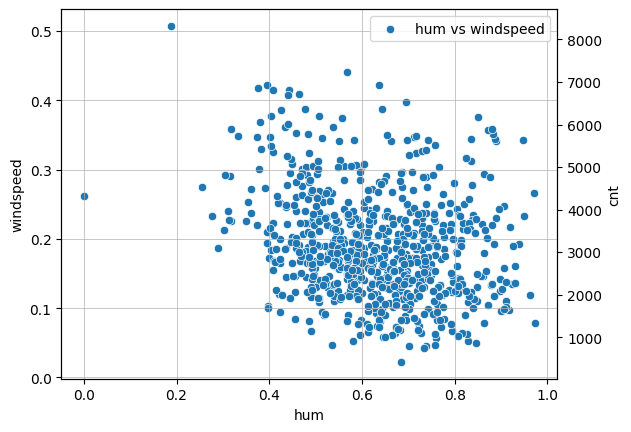

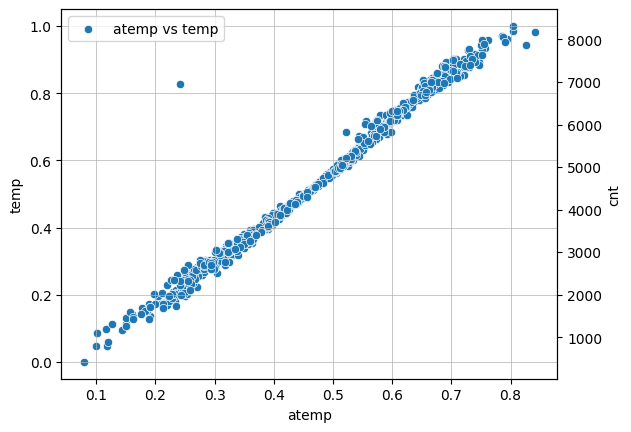

In [129]:
# Plot perbandingan hum vs windspeed
fig, ax1 = plt.subplots()  # Membuat figure dan sumbu utama
sns.scatterplot(x=sepeda_harian["hum"], y=sepeda_harian["windspeed"], ax=ax1, label="hum vs windspeed")
ax1.set_xlabel("hum")
ax1.set_ylabel("windspeed")
ax1.grid(True, linewidth=0.5)

# Membuat sumbu y kedua untuk cnt
ax2 = ax1.twinx()
ax2.set_ylabel("cnt")
ax2.set_ylim(sepeda_harian["cnt"].min(), sepeda_harian["cnt"].max())
plt.show()

# Plot perbandingan atemp vs temp
fig, ax1 = plt.subplots()
sns.scatterplot(x=sepeda_harian["atemp"], y=sepeda_harian["temp_norm"], ax=ax1, label="atemp vs temp")
ax1.set_xlabel("atemp")
ax1.set_ylabel("temp")
ax1.grid(True, linewidth=0.5)

# Membuat sumbu y kedua untuk cnt (menampilkan angkanya tanpa memplot cnt)
ax2 = ax1.twinx()
ax2.set_ylabel("cnt")
ax2.set_ylim(sepeda_harian["cnt"].min(), sepeda_harian["cnt"].max())  # Atur range sumbu y kanan sesuai cnt

plt.show()


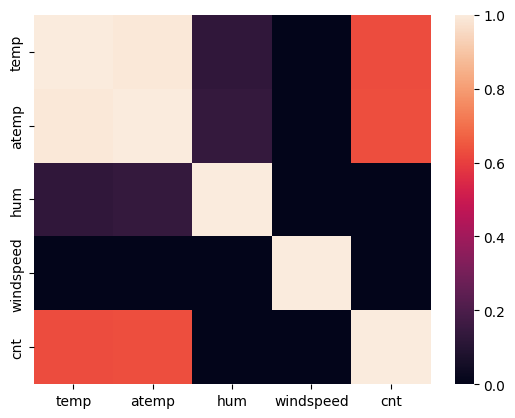

In [130]:
sns.heatmap(korelasi, vmax=1, vmin=0)
plt.show()

Dapat dilihat dari scatterplot di atas diketahui pola penyebaran data temp dan atemp pada cnt akan menaik maka pola tersebut positif dalam banyaknya penyewaan sepeda. Sedangkan pola penyebaran data hum dan windspeed menaik ke kiri yang berarti variabel tersebut bertolak belakang dengan banyaknya penyewaan sepeda.

Hal ini diperkuat dengan perbandingan hubungan variabel antara hum vs windspeed dengan temp vs atemp yakni. Pola penyebaran hum vs windspeed berkumpul di satu tempat. Sedangkan pola penyebaran temp vs atemp membuat garis positif dikarenakan hubungan antar variabel tersebut sangatlah kuat.

Hal ini dapat dilihat dari heatmap terlihat pada variabel temp dan atemp mempunyai warna putih dengan indaktor hampir sempurna dan variabel cnt dan atemp berwarna merah dengan indaktor berada pada interval 0.6 sampai 0.8

## Conclusion

- **Pengaruh musim dan cuaca dengan banyaknya penyewaaan sepeda?**

  Sangat berpengaruh dikarenakan pada plot diketahui bahwa musim panas merupakan musim terbaik untuk penyewaan sepeda dikarenakan cuaca pada musim panas tidak berawan sehingga dapat menikmat sepeda dengan minimnya gangguan eksternal cuaca. Akan tetapi, pada musim dingin merupakan musim yang buruk baik penyewaan sepeda dikarenakan cuaca yang kurang baik maupun cuaca tersebut meliputi tidak berawan, berkabut, dan badai salju/hujan.

- **Bagaimana korelasi antara temp, atemp, hum, windspeed dengan cnt dalam menentukan banyaknya penyewaaan sepeda?**

  Korelasi antar variabel temp, atemp, hum, dan windspeed pada cnt sangat bervariasi. Korelasi antar hum, windspeed dengan cnt tidak berdampak yang kuat akan tetapi, bertolak belakang dalam banyaknya penyewaan sepeda. Di lain sisi, korelasi antara atemp dengan cnt berlangsung baik dengan nilai $0.631066$ oleh karena itu variabel atemp merupakan variabel yang berkontribusi dalam penyewaan sepeda.

In [142]:
sepeda_harian.to_csv('day_sepeda_harian.csv', index=False)